6210407960 นายธนกร วงษ์สนิท

**Import Necessary Libraries**

In [2]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import keras
from keras.utils.np_utils import to_categorical
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.layers import  Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from keras.models import Model
from tensorflow.keras.layers import Input
from keras import optimizers
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras import callbacks
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [5]:
ls ./Dataset/Dataset2_GeoTransformAndIntensity

test/  train/  val/


In [6]:
cd ./Dataset/Dataset2_GeoTransformAndIntensity

/data/home/b6210407960/Dataset/Dataset2_GeoTransformAndIntensity


In [7]:
pwd

'/data/home/b6210407960/Dataset/Dataset2_GeoTransformAndIntensity'

#### ตรวจสอบข้อมูล

In [9]:
ls /data/home/b6210407960/Dataset/Dataset2_GeoTransformAndIntensity/train

AugmentedCOVID/  COVID/  Normal/


In [8]:
data_dir = '/data/home/b6210407960/Dataset/Dataset2_GeoTransformAndIntensity/train/COVID'

In [10]:
os.listdir(data_dir)

['trainCOVID1.png',
 'trainCOVID2.png',
 'trainCOVID3.png',
 'trainCOVID4.png',
 'trainCOVID5.png',
 'trainCOVID6.png',
 'trainCOVID7.png',
 'trainCOVID8.png',
 'trainCOVID9.png',
 'trainCOVID10.png',
 'trainCOVID11.png',
 'trainCOVID12.png',
 'trainCOVID13.png',
 'trainCOVID14.png',
 'trainCOVID15.png',
 'trainCOVID16.png',
 'trainCOVID17.png',
 'trainCOVID18.png',
 'trainCOVID19.png',
 'trainCOVID20.png',
 'trainCOVID21.png',
 'trainCOVID22.png',
 'trainCOVID23.png',
 'trainCOVID24.png',
 'trainCOVID25.png',
 'trainCOVID26.png',
 'trainCOVID27.png',
 'trainCOVID28.png',
 'trainCOVID29.png',
 'trainCOVID30.png',
 'trainCOVID31.png',
 'trainCOVID32.png',
 'trainCOVID33.png',
 'trainCOVID34.png',
 'trainCOVID35.png',
 'trainCOVID36.png',
 'trainCOVID37.png',
 'trainCOVID38.png',
 'trainCOVID39.png',
 'trainCOVID40.png',
 'trainCOVID41.png',
 'trainCOVID42.png',
 'trainCOVID43.png',
 'trainCOVID44.png',
 'trainCOVID45.png',
 'trainCOVID46.png',
 'trainCOVID47.png',
 'trainCOVID48.png',
 

In [11]:
data = []
for file in os.listdir(data_dir):
    data.append([file, 'COVID'])
        
data = pd.DataFrame(data, columns = ['image_file', 'result'])

In [12]:
data['path'] = data_dir + '/' + data['image_file']
data['corona_result'] = data['result'].map({'Normal': 'Negative', 'COVID': 'Positive'})

In [13]:
data.head().path[0]

'/data/home/b6210407960/Dataset/Dataset2_GeoTransformAndIntensity/train/COVID/trainCOVID1.png'

In [14]:
data.head(5)

,image_file,result,path,corona_result
0,trainCOVID1.png,COVID,/data/home/b6210407960/Dataset/Dataset2_GeoTra...,Positive
1,trainCOVID2.png,COVID,/data/home/b6210407960/Dataset/Dataset2_GeoTra...,Positive
2,trainCOVID3.png,COVID,/data/home/b6210407960/Dataset/Dataset2_GeoTra...,Positive
3,trainCOVID4.png,COVID,/data/home/b6210407960/Dataset/Dataset2_GeoTra...,Positive
4,trainCOVID5.png,COVID,/data/home/b6210407960/Dataset/Dataset2_GeoTra...,Positive


In [15]:
print('Number of Duplicated Samples: %d'%(data.duplicated().sum()))
print('Number of Total Samples: %d'%(data.isnull().value_counts()))

Number of Duplicated Samples: 0
Number of Total Samples: 2710


In [13]:
numSample = 2710

## อ่านข้อมูล

In [16]:
arr = []
for file in os.listdir(data_dir):
        arr.append(['{}/{}'.format('COVID', file), 1, 'COVID']) #defectID-> Normal=0,COVID=1  
df = pd.DataFrame(arr, columns=['File', 'DiseaseID','Disease Type'])

In [17]:
df.sample(5)

,File,DiseaseID,Disease Type
357,COVID/trainCOVID358.png,1,COVID
2318,COVID/trainCOVID2319.png,1,COVID
713,COVID/trainCOVID714.png,1,COVID
1939,COVID/trainCOVID1940.png,1,COVID
1019,COVID/trainCOVID1020.png,1,COVID


In [23]:
pwd

'/data/home/b6210407960/Dataset/Dataset2_GeoTransformAndIntensity'

In [24]:
IMAGE_SIZE = 64
path = '/data/home/b6210407960/Dataset/Dataset2_GeoTransformAndIntensity/train'

def read_image(filepath):
    return cv2.imread(os.path.join(path, filepath)) 

def resize_image(image, image_size):
    # cv2.INTER_AREA: This is used when we need to shrink an image.
    return cv2.resize(image.copy(), image_size, interpolation=cv2.INTER_AREA)   

In [25]:
df['File'].values

array(['COVID/trainCOVID1.png', 'COVID/trainCOVID2.png',
       'COVID/trainCOVID3.png', ..., 'COVID/trainCOVID2708.png',
       'COVID/trainCOVID2709.png', 'COVID/trainCOVID2710.png'],
      dtype=object)

In [26]:
IMAGE_SIZE = 64
dataset = np.zeros((df.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3)) #arrayไว้เก็บ image ที่อ่าน
for i, file in tqdm(enumerate(df['File'].values)):
    image = read_image(file)
    if image is not None:
        dataset[i] = image
X_images = dataset
print(X_images.shape)

2710it [00:02, 1128.14it/s]

(2710, 64, 64, 3)


In [27]:
df['DiseaseID'].values

array([1, 1, 1, ..., 1, 1, 1])

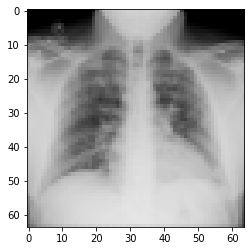

In [32]:
image = X_images[5].astype('uint8')
plt.imshow(image)

In [33]:
Y_images = df['DiseaseID'].values

In [34]:
Y_images

array([1, 1, 1, ..., 1, 1, 1])

## ImageDataGenerator:

In [35]:
SIZE=64
N_ch=3

In [36]:
for i in range(5):
    path =  '/data/home/b6210407960/Dataset/Dataset2_GeoTransformAndIntensity/train/AugmentedCOVID/'
    filename = path+'augmCOVID'+str(i)+'.png'
    print(filename)

/data/home/b6210407960/Dataset/Dataset2_GeoTransformAndIntensity/train/AugmentedCOVID/augmCOVID0.png
/data/home/b6210407960/Dataset/Dataset2_GeoTransformAndIntensity/train/AugmentedCOVID/augmCOVID1.png
/data/home/b6210407960/Dataset/Dataset2_GeoTransformAndIntensity/train/AugmentedCOVID/augmCOVID2.png
/data/home/b6210407960/Dataset/Dataset2_GeoTransformAndIntensity/train/AugmentedCOVID/augmCOVID3.png
/data/home/b6210407960/Dataset/Dataset2_GeoTransformAndIntensity/train/AugmentedCOVID/augmCOVID4.png


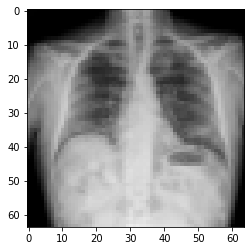

In [42]:
#importing the necessary libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#define a function to display 9 augmented images
def show_image(iterator):
    for i in range(9):
        plt.subplot(330 + 1 + i)
        batch = iterator.next()
        image = batch[0].astype('uint8')
        plt.imshow(image)
    plt.show()
    
def show_save_image(iterator):
    # generate samples and plot
    for i in range(9):
        plt.subplot(330 + 1 + i)
        batch = iterator.next()
        image = batch[0].astype('uint8')
        plt.imshow(image)
        path = '/data/home/b6210407960/Dataset/Dataset2_GeoTransformAndIntensity/train/AugmentedCOVID/'
        filename = path+'augmCOVID'+str(i+1)+'.png'
        cv2.imwrite(filename, image)
    plt.show() 

#load and display the original image
path = '/data/home/b6210407960/Dataset/Dataset2_GeoTransformAndIntensity/train/'
img = load_img(path+'COVID/trainCOVID8.png') 
plt.imshow (img) 
data = img_to_array(img) 
samples = np.expand_dims(data, 0)

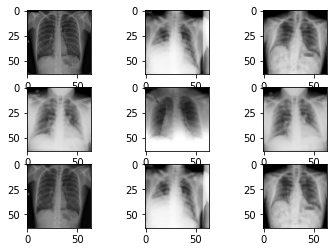

In [48]:
# rotation_range 
datagen = ImageDataGenerator(rotation_range = 5)
iterator = datagen.flow(X_images[5:10], batch_size=1)

show_save_image(iterator)

In [49]:
ls

test/  train/  val/


In [50]:
ls ./train/AugmentedCOVID/

augmCOVID1.png  augmCOVID3.png  augmCOVID5.png  augmCOVID7.png  augmCOVID9.png
augmCOVID2.png  augmCOVID4.png  augmCOVID6.png  augmCOVID8.png


In [52]:
im1 = cv2.imread('/data/home/b6210407960/Dataset/Dataset2_GeoTransformAndIntensity/train/AugmentedCOVID/augmCOVID4.png')

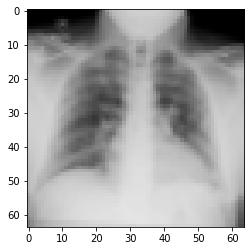

In [53]:
plt.imshow(im1)

In [54]:
def save_image(iterator,numIm):
    for i in range(numIm):
        batch = iterator.next()
        image = batch[0].astype('uint8')
        path = '/data/home/b6210407960/Dataset/Dataset2_GeoTransformAndIntensity/train/AugmentedCOVID/'
        filename = path+'augmCOVID'+str(i+1)+'.png'
        cv2.imwrite(filename, image)

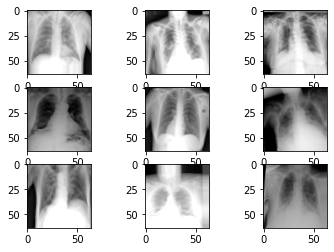

In [91]:
#combine
datagen = ImageDataGenerator(rotation_range=5, 
                        width_shift_range=0.05, 
                        height_shift_range=0.1,
                        zoom_range=0.1, 
                        horizontal_flip=True, 
                        vertical_flip=False,
                        brightness_range = [0.7,1.3]) 
iterator = datagen.flow(X_images[38:48], batch_size=1)
show_image(iterator)

## Augment and save

ต้องAugmentให้มีจำนวน7287รูป

In [147]:
#combine
datagen = ImageDataGenerator(rotation_range=5, 
                        width_shift_range=0.05, 
                        height_shift_range=0.1,
                        zoom_range=0.1, 
                        horizontal_flip=True, 
                        vertical_flip=False,
                        brightness_range = [0.7,1.3]) 
iterator = datagen.flow(X_images, batch_size=1)
save_image(iterator,7287)

In [148]:
ls /data/home/b6210407960/Dataset/Dataset2_GeoTransformAndIntensity/train/AugmentedCOVID/

augmCOVID1.png     augmCOVID2639.png  augmCOVID4279.png  augmCOVID5919.png
augmCOVID10.png    augmCOVID264.png   augmCOVID428.png   augmCOVID592.png
augmCOVID100.png   augmCOVID2640.png  augmCOVID4280.png  augmCOVID5920.png
augmCOVID1000.png  augmCOVID2641.png  augmCOVID4281.png  augmCOVID5921.png
augmCOVID1001.png  augmCOVID2642.png  augmCOVID4282.png  augmCOVID5922.png
augmCOVID1002.png  augmCOVID2643.png  augmCOVID4283.png  augmCOVID5923.png
augmCOVID1003.png  augmCOVID2644.png  augmCOVID4284.png  augmCOVID5924.png
augmCOVID1004.png  augmCOVID2645.png  augmCOVID4285.png  augmCOVID5925.png
augmCOVID1005.png  augmCOVID2646.png  augmCOVID4286.png  augmCOVID5926.png
augmCOVID1006.png  augmCOVID2647.png  augmCOVID4287.png  augmCOVID5927.png
augmCOVID1007.png  augmCOVID2648.png  augmCOVID4288.png  augmCOVID5928.png
augmCOVID1008.png  augmCOVID2649.png  augmCOVID4289.png  augmCOVID5929.png
augmCOVID1009.png  augmCOVID265.png   augmCOVID429.png   augmCOVID593.png
augmCOVID101.png   augmCOVI

In [167]:
im1 = cv2.imread('/data/home/b6210407960/Dataset/Dataset2_GeoTransformAndIntensity/train/AugmentedCOVID/augmCOVID9.png')

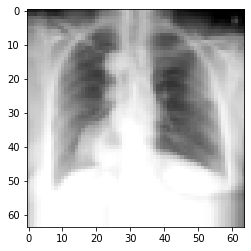

In [168]:
plt.imshow(im1)

In [169]:
len(os.listdir('/data/home/b6210407960/Dataset/Dataset2_GeoTransformAndIntensity/train/AugmentedCOVID'))

7287

In [170]:
len(os.listdir('/data/home/b6210407960/Dataset/Dataset2_GeoTransformAndIntensity/train/Normal'))

7287

จำนวนข้อมูลมีขนาดเท่ากันแล้ว

### copy to local machine

`scp -P 22022 -r b6210407960@158.108.30.21:/data/home/b6210407960/Dataset/Dataset2_GeoTransformAndIntensity/train/AugmentedCOVID .`